## Prediction Using Linear Regression

In this regression task we will predict the percentage of the mark that the student is expected to score on the basis of no. of hours they studied. This is a simple linear regression task which only involve two varibles.

In [1]:
# importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the csv file
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Plotting the data points in a scatter plot to find out any relationship manually

Text(0, 0.5, 'Percentage')

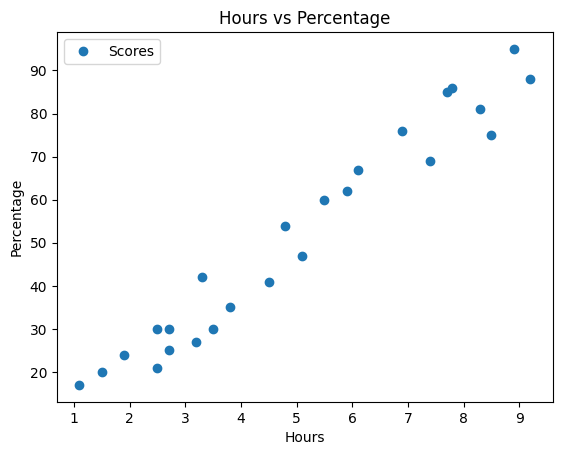

In [7]:
df.plot(x="Hours",y="Scores",style="o")
plt.title('Hours vs Percentage')
plt.xlabel('Hours')
plt.ylabel('Percentage')

#### Preparing the data for Train,Test and Split

We have to divide the data into input features and target variables

In [8]:
x=df.drop(['Scores'],axis=1)
y=df['Scores']

After dividing the data we have to split the data into training and testing sets using the scikit-learn built in trian_test_split() method

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### Training the Algorithm

we have successfully divided the data into training and testing sets now we have to train the algorithm

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

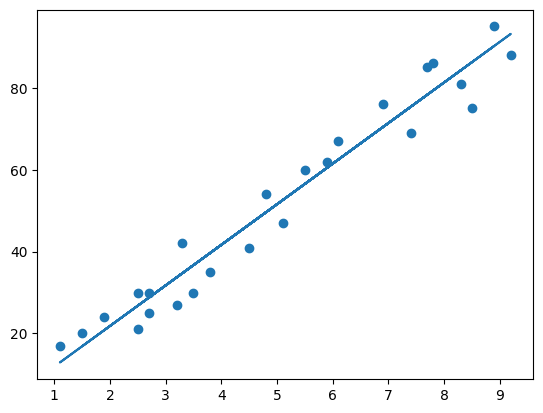

In [11]:
# plotting the regression line
line = lr.coef_*x+lr.intercept_


plt.scatter(x,y)
plt.plot(x,line)

### Making Predictions

In [12]:
y_pred = lr.predict(x_test)

In [13]:
data = pd.DataFrame({'Actual':y_test,'Predict':y_pred})
data

,Actual,Predict
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


#### Trying the prediction with dynamic inputs

In [14]:
hours = (9.25)
convert_to_array = np.asarray(hours)
re_shape = convert_to_array.reshape(1,-1)
prediction = lr.predict(re_shape)
print('No. of hours : ',hours)
print('prediction : ',prediction[0])

No. of hours :  9.25
prediction :  93.69173248737535


C:\Users\Nithin\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Evaluating the Model

In [15]:
from sklearn import metrics
print('Mean Absolute Error = ',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error =  4.183859899002975


In [17]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9454906892105355